In [62]:
import pandas as pd
df = pd.read_csv('my_dataframe.csv',encoding='utf-8')
df.head()  #spoken=1  written=0

,texts,label,parse_tree_depth,noun_count_hi,verb_count_hi,adverb_count_hi,pronoun_count_hi,total_words_hi,noun_percentage_hi,verb_percentage_hi,...,pronoun_percentage_hi,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,2,7,2,0,0,28,25.000000,7.142857,...,0.000000,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,2,2,1,0,1,13,15.384615,7.692308,...,7.692308,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0
2,हमे इन्तजार है ।,1,1,1,0,0,1,4,25.000000,0.000000,...,25.000000,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,2,3,1,0,1,11,27.272727,9.090909,...,9.090909,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0
4,जयपुर,0,0,0,0,0,0,1,0.000000,0.000000,...,0.000000,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0


In [63]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [64]:
X = df.drop('label', axis=1)
X = X.drop('texts', axis=1)
y = df['label']

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Accuracy:", accuracy_logistic)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8929956060997674

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3826
           1       0.90      0.89      0.89      3912

    accuracy                           0.89      7738
   macro avg       0.89      0.89      0.89      7738
weighted avg       0.89      0.89      0.89      7738



In [68]:
df_numeric = df.drop(['texts', 'label'], axis=1)
correlation_matrix = df_numeric.corr()
threshold = 0.5

In [69]:
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > threshold:
      highly_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

In [70]:
print("Highly Correlated Features:")
for feature1, feature2 in highly_correlated_features:
  print(f"{feature1} and {feature2}")

Highly Correlated Features:
parse_tree_depth and noun_count_hi
parse_tree_depth and verb_count_hi
parse_tree_depth and pronoun_count_hi
parse_tree_depth and total_words_hi
parse_tree_depth and words_per_sent
parse_tree_depth and token_type_ratio
parse_tree_depth and case_marker_count
parse_tree_depth and conjunction_count
parse_tree_depth and hesitation_markers
noun_count_hi and verb_count_hi
noun_count_hi and pronoun_count_hi
noun_count_hi and total_words_hi
noun_count_hi and words_per_sent
noun_count_hi and token_type_ratio
noun_count_hi and case_marker_count
noun_count_hi and conjunction_count
noun_count_hi and hesitation_markers
verb_count_hi and adverb_count_hi
verb_count_hi and pronoun_count_hi
verb_count_hi and total_words_hi
verb_count_hi and words_per_sent
verb_count_hi and token_type_ratio
verb_count_hi and case_marker_count
verb_count_hi and conjunction_count
verb_count_hi and hesitation_markers
adverb_count_hi and pronoun_count_hi
adverb_count_hi and total_words_hi
adverb_c

In [71]:
#keep one of them
features_to_keep = []
for feature1, feature2 in highly_correlated_features:
  if feature1 not in features_to_keep:
    features_to_keep.append(feature1)
  if feature2 not in features_to_keep:
    features_to_keep.append(feature2)

In [72]:
X_reduced = df[features_to_keep]

# Retrain the logistic regression model:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [73]:
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic_reduced = accuracy_score(y_test, y_pred_logistic)


print("\nOriginal Model Accuracy:", accuracy_logistic)
print(".5 threshold Model Accuracy:", accuracy_logistic_reduced)


Original Model Accuracy: 0.8929956060997674
.5 threshold Model Accuracy: 0.9069527009563194


*   Original Model Accuracy: 0.8929956060997674
*   .8 threshold Model Accuracy: 0.9008787800465237
*    
    .7 threshold Model Accuracy: 0.9020418712845697
*   .6 threshold Model Accuracy: 0.9055311449987077
*   .5 threshold Model Accuracy: 0.9069527009563194


In [74]:
print(df[features_to_keep].columns.tolist())

['parse_tree_depth', 'noun_count_hi', 'verb_count_hi', 'pronoun_count_hi', 'total_words_hi', 'words_per_sent', 'token_type_ratio', 'case_marker_count', 'conjunction_count', 'hesitation_markers', 'adverb_count_hi']


In [75]:
#CHI Squared test
from sklearn.feature_selection import chi2
df_numeric = df.drop(['texts', 'label'], axis=1)

chi2_scores, p_values = chi2(df_numeric, y)

In [76]:
chi2_df = pd.DataFrame({
    'feature': df_numeric.columns,
    'chi2_score': chi2_scores,
    'p_value': p_values
})

# Print the chi-squared results
print(chi2_df.to_string())

                    feature    chi2_score        p_value
0          parse_tree_depth    121.708102   2.674261e-28
1             noun_count_hi   1648.391608   0.000000e+00
2             verb_count_hi   1407.194745  5.741146e-308
3           adverb_count_hi   1217.553803  9.340948e-267
4          pronoun_count_hi  17944.259002   0.000000e+00
5            total_words_hi   1018.551919  1.666418e-223
6        noun_percentage_hi  25544.493728   0.000000e+00
7        verb_percentage_hi   1518.305885   0.000000e+00
8      adverb_percentage_hi   7890.927311   0.000000e+00
9     pronoun_percentage_hi  52651.845610   0.000000e+00
10           words_per_sent   2286.336412   0.000000e+00
11  avg_characters_per_word   1652.633346   0.000000e+00
12         token_type_ratio     14.562823   1.355629e-04
13         case_marker_perc  53902.281938   0.000000e+00
14        case_marker_count   5520.759955   0.000000e+00
15        conjunction_count    588.898108  4.350972e-130
16  conjunctions_percentage    

In [77]:
threshold = 0.05
significant_features = [feature for i, feature in enumerate(df_numeric.columns) if p_values[i] < threshold]

In [78]:
X_reduced = df[significant_features]
list1 = df[significant_features].columns.tolist()
print(list1)


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)


['parse_tree_depth', 'noun_count_hi', 'verb_count_hi', 'adverb_count_hi', 'pronoun_count_hi', 'total_words_hi', 'noun_percentage_hi', 'verb_percentage_hi', 'adverb_percentage_hi', 'pronoun_percentage_hi', 'words_per_sent', 'avg_characters_per_word', 'token_type_ratio', 'case_marker_perc', 'case_marker_count', 'conjunction_count', 'conjunctions_percentage', 'hesitation_markers', 'wh_question_count']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [79]:
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic_reduced = accuracy_score(y_test, y_pred_logistic)

# Compare the accuracy of the original and reduced models
print("\nOriginal Model Accuracy:", accuracy_logistic)
print("After testing Model Accuracy:", accuracy_logistic_reduced)


Original Model Accuracy: 0.8929956060997674
After testing Model Accuracy: 0.916903592659602


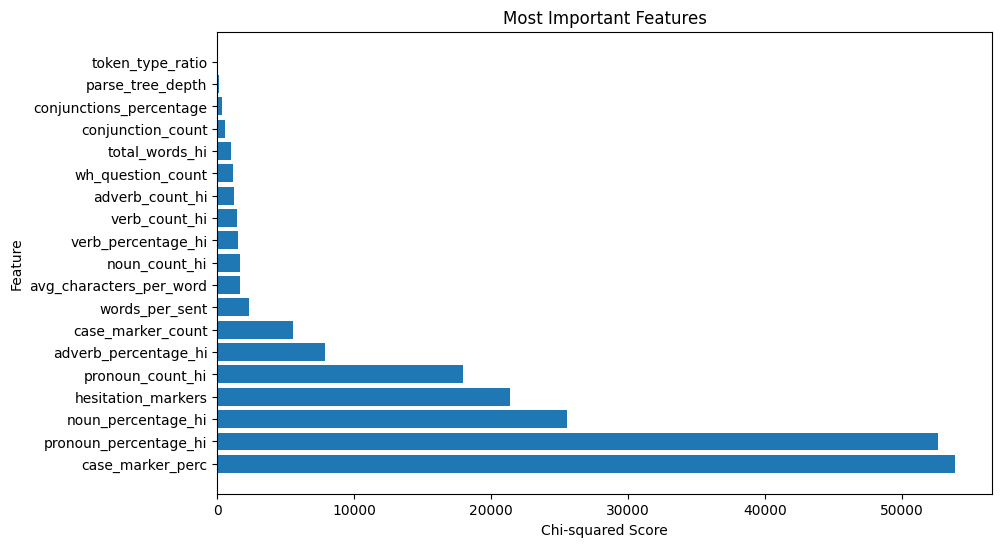

In [80]:
import matplotlib.pyplot as plt
features_and_scores = list(zip(df_numeric.columns, chi2_scores))
features_and_scores.sort(key=lambda x: x[1], reverse=True)
features, scores = zip(*features_and_scores)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel("Chi-squared Score")
plt.ylabel("Feature")
plt.title("Most Important Features")
plt.show()


*   High p-values indicate that there is no statistically significant association between the feature and the target variable.
*   Low p-values indicate that there is a statistically significant association between the feature and the target variable.



In [82]:
#Z Scores
import scipy.stats as stats
df_numeric_zscores = df_numeric.apply(stats.zscore)

print(df_numeric_zscores.head())

   parse_tree_depth  noun_count_hi  verb_count_hi  adverb_count_hi  \
0         -0.255347       0.324114      -0.156264        -0.437072   
1         -0.255347      -0.507703      -0.449467        -0.437072   
2         -1.178951      -0.674067      -0.742670        -0.437072   
3         -0.255347      -0.341340      -0.449467        -0.437072   
4         -2.102554      -0.840430      -0.742670        -0.437072   

   pronoun_count_hi  total_words_hi  noun_percentage_hi  verb_percentage_hi  \
0         -0.519341        0.128981            0.506792           -0.399017   
1         -0.228440       -0.401014           -0.406608           -0.326168   
2         -0.228440       -0.719011            0.506792           -1.346058   
3         -0.228440       -0.471680            0.722686           -0.140733   
4         -0.519341       -0.825010           -1.868047           -1.346058   

   adverb_percentage_hi  pronoun_percentage_hi  words_per_sent  \
0             -0.341091              -

In [85]:
abs_z_scores = df_numeric_zscores.abs().mean(axis=0)
important_features = abs_z_scores.sort_values(ascending=False)

# Print the top 15 most important features
print("Top 5 most important features based on z-scores:")
print(important_features.head(15))


Top 5 most important features based on z-scores:
case_marker_perc           0.802563
token_type_ratio           0.778145
noun_percentage_hi         0.763692
avg_characters_per_word    0.755553
pronoun_percentage_hi      0.749217
conjunctions_percentage    0.742973
verb_percentage_hi         0.720830
adverb_count_hi            0.672351
parse_tree_depth           0.640842
noun_count_hi              0.582145
conjunction_count          0.578475
case_marker_count          0.570717
verb_count_hi              0.550280
total_words_hi             0.534240
words_per_sent             0.533374
dtype: float64


In [87]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred_logistic = logistic_regression.predict(X_test)

accuracy_logistic_reduced = accuracy_score(y_test, y_pred_logistic)

print("\nAccuracy after removing low variance features:", accuracy_logistic_reduced)



Accuracy after removing low variance features: 0.916903592659602


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
